# Olympic Analysis.

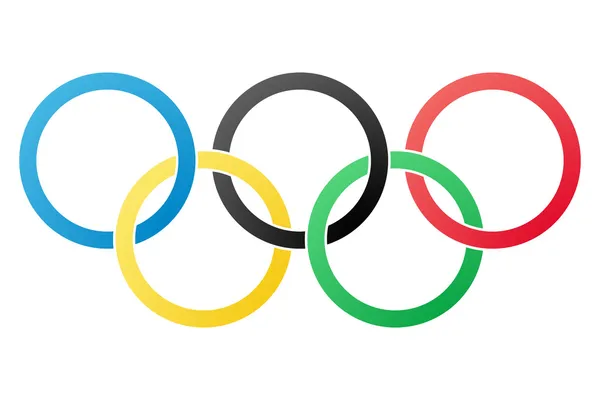

These dataset contains the information as per the given belo: 



| Columns  | Description  |
|---|---|
| name  | Name of the participant  |
| age  | Age of the participant  |
| country  | Country of the participant  |
| year  | Year of participation |
|  Date_Given | Given date |
|  sports | Sport of the participant  |
| gold_medal  | Gold Medal won |
| silver_medal  | Silver Medal won  |
| brone_medal  | Brone Medal won  |
|  total_medal | Total Medals won  |


## Problem Statements Given:
- Please do the basic exploration of the data. Remember the dataset contains information from different years. So whatever steps you perform should make logical sense.
- Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.
- Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.
- Please remove special characters from the name column.
- Perform data visualization techniques to appropriate columns and explain them.  
- Please check if the age dataset is skewed or symmetric. Based on results perform transformation.
- Please perform appropriate numerical measures on each column and report them accordingly.
- Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.
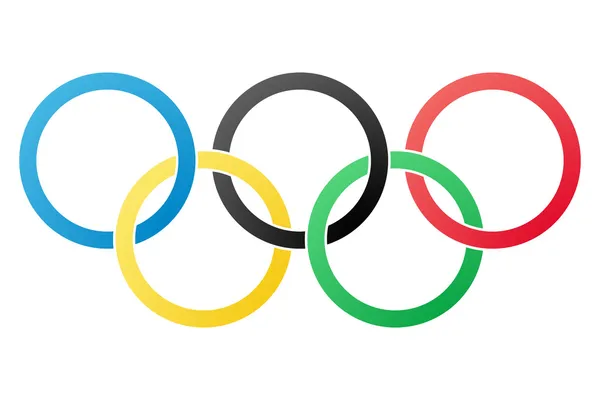

In [1]:
#importing important python libraries
import numpy as np # this library is used for dealing with arrays and numerical values
import pandas as pd # this library is used for dealing with dataframes
import matplotlib.pyplot as plt # this library is used for visulization
import seaborn as sns # this library is used for visulization
import missingno as msno # this library is used for visualising mssing values
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
#Reading dataset 
olympic=pd.read_csv('olympix_data_organized_with_header.csv',sep=',') 

In [3]:
olympic.head(10)

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
5,Alicia Coutts,24.0,Australia,2012,08-12-2012,Swimming,1,3,1,5
6,Missy Franklin,17.0,United States,2012,08-12-2012,Swimming,4,0,1,5
7,Ryan Lochte,27.0,United States,2012,08-12-2012,Swimming,2,2,1,5
8,Allison Schmitt,22.0,United States,2012,08-12-2012,Swimming,3,1,1,5
9,Natalie Coughlin,21.0,United States,2004,8/29/2004,Swimming,2,2,1,5


In [4]:
olympic.tail(10)

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8608,Butch Johnson,45.0,United States,2000,10-01-2000,Archery,0,0,1,1
8609,Kim Cheong-Tae,20.0,South Korea,2000,10-01-2000,Archery,1,0,0,1
8610,Barbara Mensing,39.0,Germany,2000,10-01-2000,Archery,0,0,1,1
8611,O Gyo-Mun,28.0,South Korea,2000,10-01-2000,Archery,1,0,0,1
8612,Cornelia Pfohl,29.0,Germany,2000,10-01-2000,Archery,0,0,1,1
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,10-01-2000,Archery,0,0,1,1


In [5]:
olympic.sample(10)

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
2382,Cristina Teuscher,22.0,United States,2000,10-01-2000,Swimming,0,0,1,1
408,Sun Yujie,19.0,China,2012,08-12-2012,Fencing,1,0,1,2
3577,Sebastian Bea,23.0,United States,2000,10-01-2000,Rowing,0,1,0,1
3985,Xian Dongmei,32.0,China,2008,8/24/2008,Judo,1,0,0,1
3841,Natalie Geisenberger,22.0,Germany,2010,2/28/2010,Luge,0,0,1,1
3202,Sophie Hosking,26.0,Great Britain,2012,08-12-2012,Rowing,1,0,0,1
3143,Ruslana Taran,29.0,Ukraine,2000,10-01-2000,Sailing,0,0,1,1
6486,Marty Nothstein,29.0,United States,2000,10-01-2000,Cycling,1,0,0,1
6307,Jaroslav Kulhavý,27.0,Czech Republic,2012,08-12-2012,Cycling,1,0,0,1
3347,Tom James,24.0,Great Britain,2008,8/24/2008,Rowing,1,0,0,1


- Getting some basic information about the dataset

In [6]:
# Getting information of dataset using info() function
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


- There are total **8618 rows** and **10 columns** are there.

- We can observe that **name** and **age** columns are having **5** null values.

- Also we had analyzed that **year** should be in the object datatype. 

## Changing the datatype :-

In [7]:
# Changing the data type of year from int to str
olympic = olympic.astype({"year": str}, errors='raise') 
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   object 
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 673.4+ KB


Now as we can see the **year** column is now readed as the **object**.

## Dealing with Missing and Duplicate values :-

<AxesSubplot:>

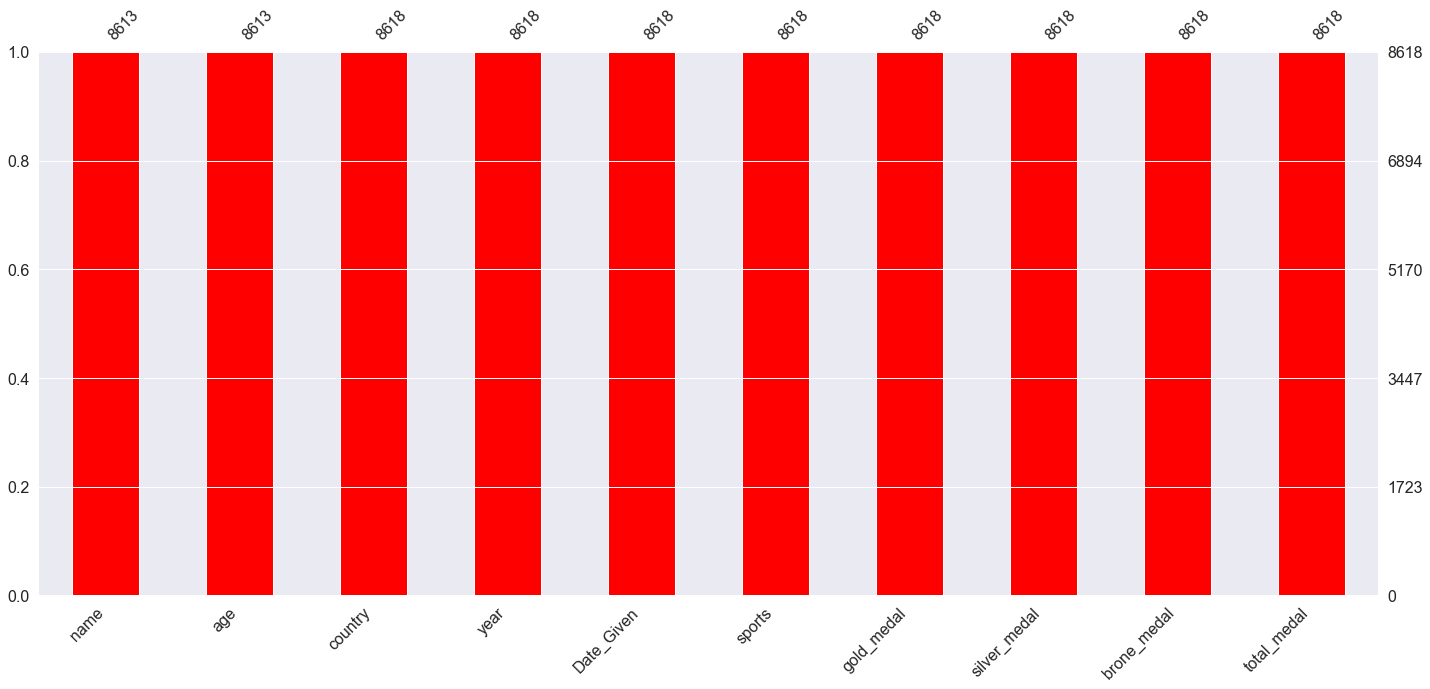

In [8]:
# Plotting bar graph for the missing values in our dataset.
msno.bar(olympic, color='red')

In [9]:
olympic.isnull().sum()

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In column **name** and **age** there are 5 missing values.
`

- **Let's check which rows have the null values.**

In [10]:
# Loading the rows which have null values
olm_null = olympic.isnull().any(axis=1)
olm_null = olympic[olm_null]
olm_null

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,08-12-2012,Hockey,0,1,0,1
4486,NaN,NaN,Argentina,2012,08-12-2012,Hockey,0,1,0,1


Here as per the result we anlysed that the rows which are having null values have the duplicate data. 

- **Let's check for the duplicate data in our dataset.**

In [11]:
# Loading the rows which are duplicate values
dup = olympic[olympic.duplicated()]
dup

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1429,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
4486,NaN,NaN,Argentina,2012,08-12-2012,Hockey,0,1,0,1


Here as we can see all the rows with duplicate data have the null values in it.

Now, we will do 2 things:-
  - We will drop the duplicate values.
  - And then we will replace the null values present in remaining rows.

In [12]:
# Droping the duplicated values.
olympic = olympic.drop_duplicates()

In [13]:
# Again checking for the null values rows.
olm_null = olympic.isnull().any(axis=1)
olm_null = olympic[olm_null]
olm_null

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,08-12-2012,Hockey,0,1,0,1


After droping the duplicate values we only have to 2 rows with null values.

From here as we are having only two rows we can drop it which will not that much affect on the dataset. But we are going to replace the values due to which stability of the dataset will be maintain.

-  We will replace the **age** column with the **mean value** of the row
-  And the **name** column with string **unknown**.

In [14]:
# Replacing the null values of age column with mean value
# Finding the mean value of the coolumn.
mean_age = olympic['age'].mean()
mean_age

26.405433646812956

In [15]:
olympic['age'].fillna(26, inplace=True)
olympic['name'].fillna('unknown', inplace=True)

Here we had replace the null values of age with **26**, because 26 is the mean value of the coolumn.

Also we had replaced the null value of **name** column with unknown. 

In [16]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8615 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8615 non-null   object 
 1   age           8615 non-null   float64
 2   country       8615 non-null   object 
 3   year          8615 non-null   object 
 4   Date_Given    8615 non-null   object 
 5   sports        8615 non-null   object 
 6   gold_medal    8615 non-null   int64  
 7   silver_medal  8615 non-null   int64  
 8   brone_medal   8615 non-null   int64  
 9   total_medal   8615 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 740.4+ KB


In [17]:
olympic.isnull().sum()

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

<AxesSubplot:>

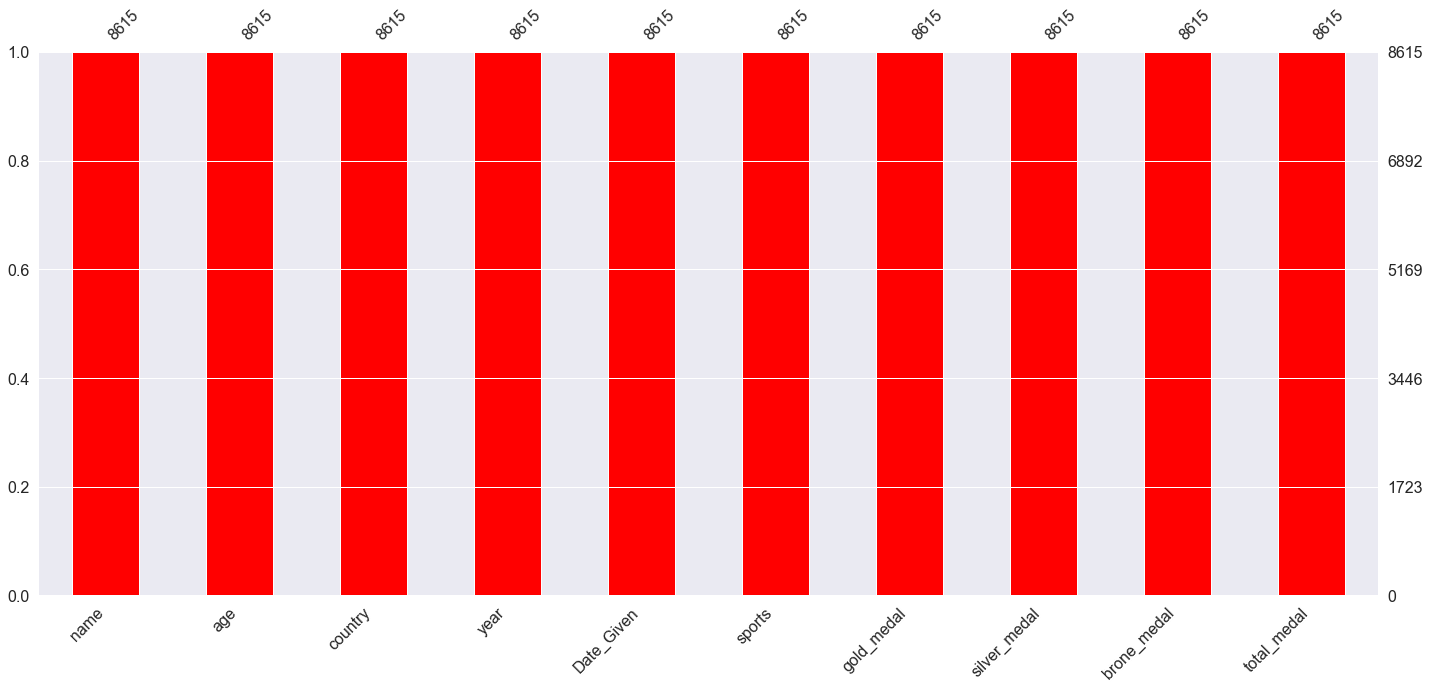

In [18]:
msno.bar(olympic, color='red')

Here as we can see there are no more missing/null values presented in our dataset.

## Data visualization :-

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

**There are 3 types of visualizations are there :-**
- Univariate analysis
- Bivariate analysis
- Multivariate analysis

1. **Univariate analysis**

    Univariate analysis is basically the simplest form to analyze data. Uni means one and this means that the data has only one kind of variable. The major reason for univariate analysis is to use the data to describe. The analysis will take data, summarise it, and then find some pattern in the data

In [19]:
numeric = ['age','gold_medal','silver_medal', 'brone_medal', 'total_medal']

 -  **Distribution of all the data**

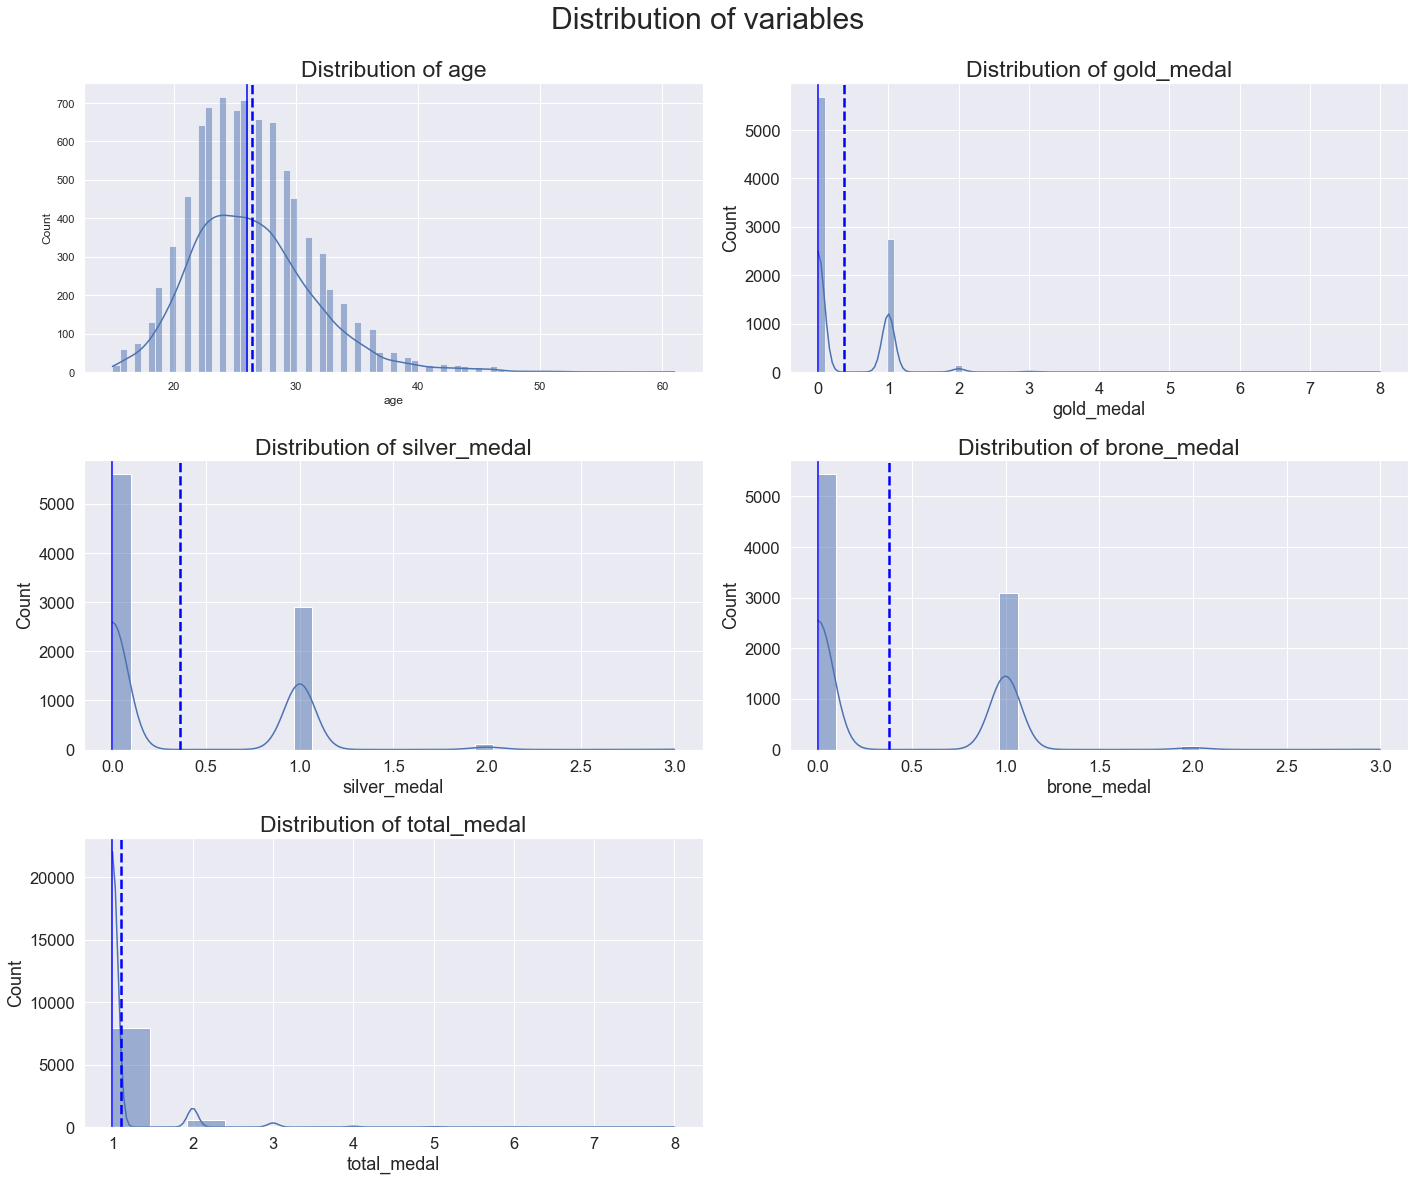

In [20]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(olympic[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=olympic[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=olympic[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()

 -  **Outliers of all the data**

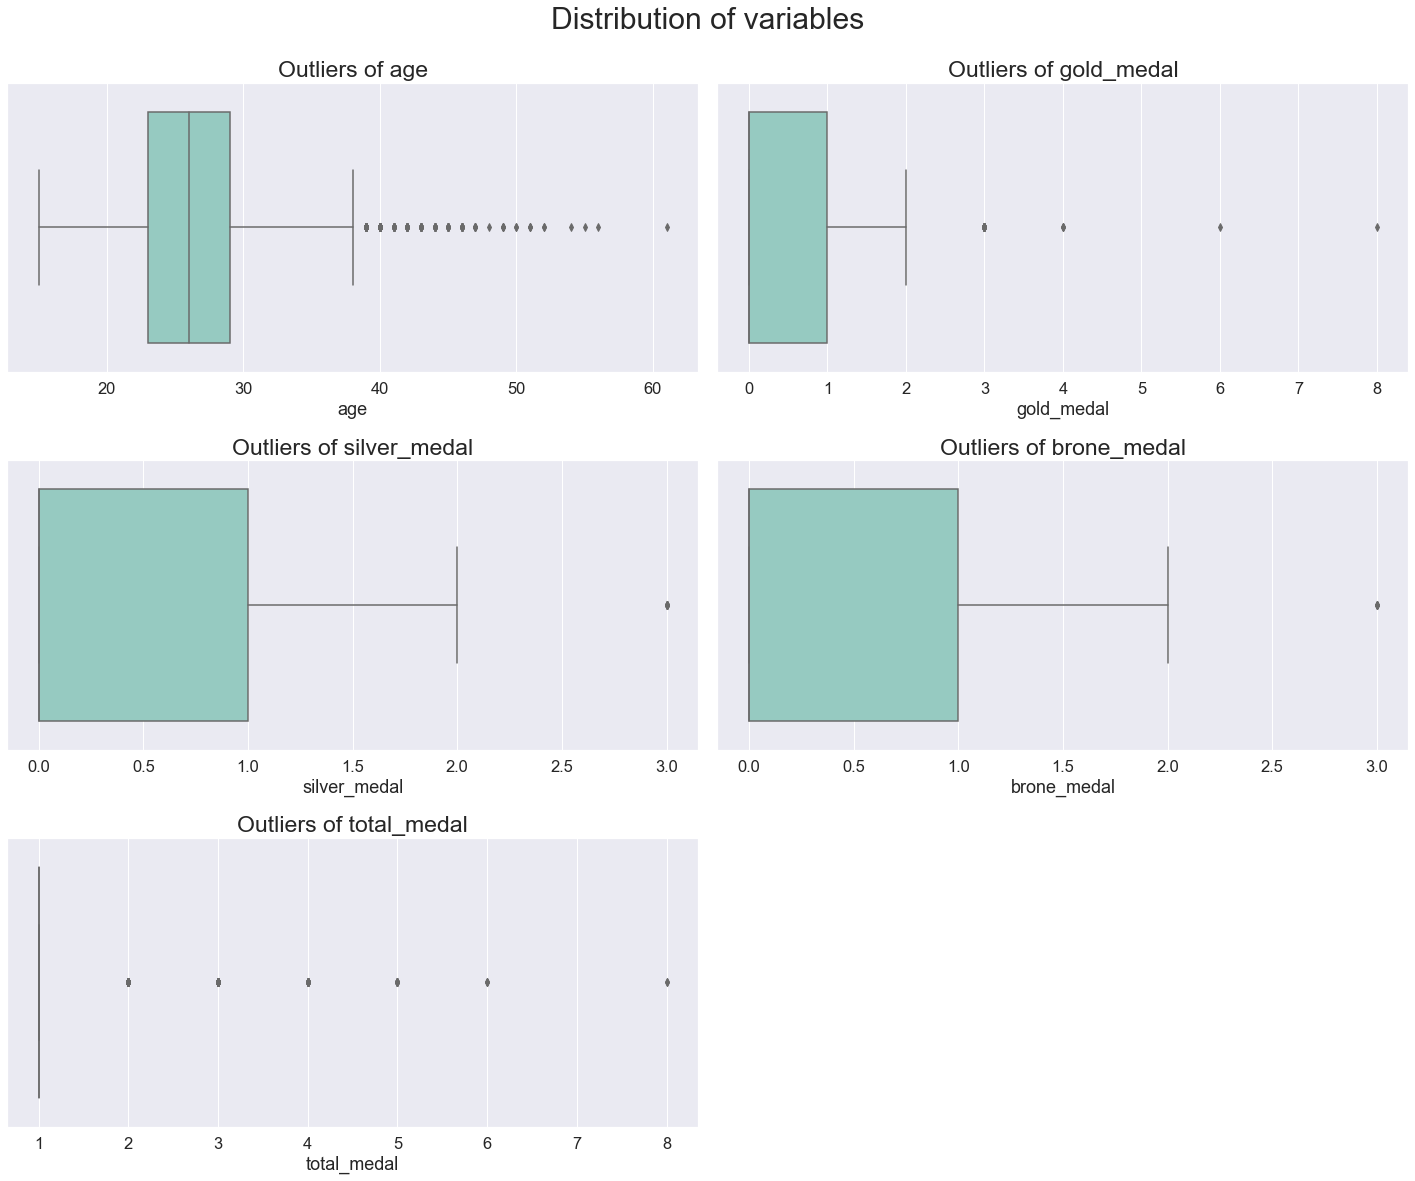

In [21]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.boxplot(x=olympic[i], palette='Set3')    
    ax.set_title('Outliers of %s'%(i), fontsize=23)
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()

-  **Counts of silver medals**

Text(0.5, 1.0, 'Counts of silver medals')

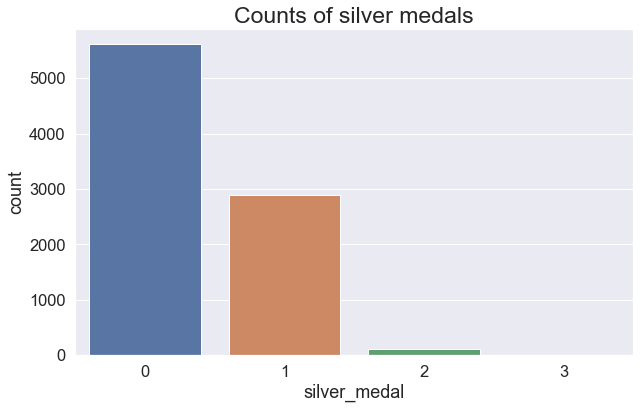

In [22]:
sns.countplot(x='silver_medal', data=olympic)
plt.title('Counts of silver medals', fontsize=23)

-  **Counts of gold medals**

Text(0.5, 1.0, 'Counts of gold medals')

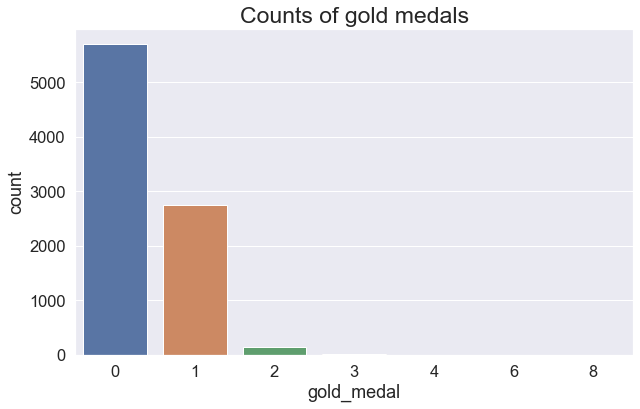

In [23]:
sns.countplot(x='gold_medal', data=olympic)
plt.title('Counts of gold medals', fontsize=23)

-  **Counts of brone medals**

Text(0.5, 1.0, 'Counts of brone medals')

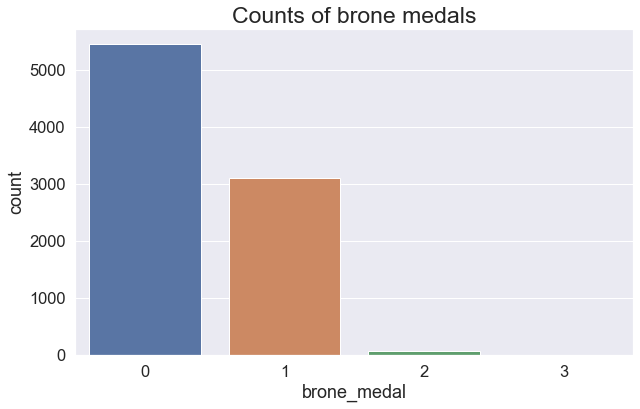

In [24]:
sns.countplot(x='brone_medal', data=olympic)
plt.title('Counts of brone medals', fontsize=23)

-  **Counts of Total medals**

Text(0.5, 1.0, 'Counts of total medals')

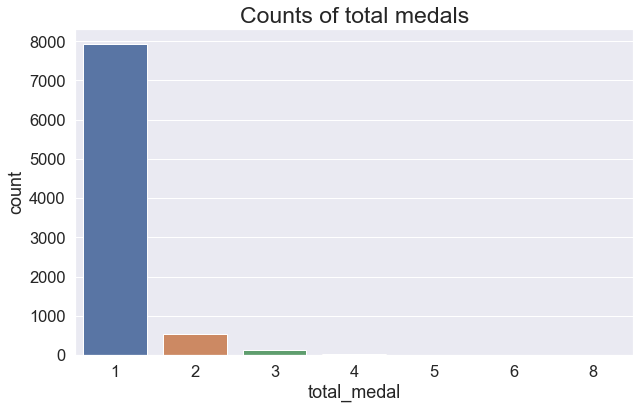

In [25]:
sns.countplot(x='total_medal', data=olympic)
plt.title('Counts of total medals', fontsize=23)

Text(0.5, 1.0, 'Counts of years')

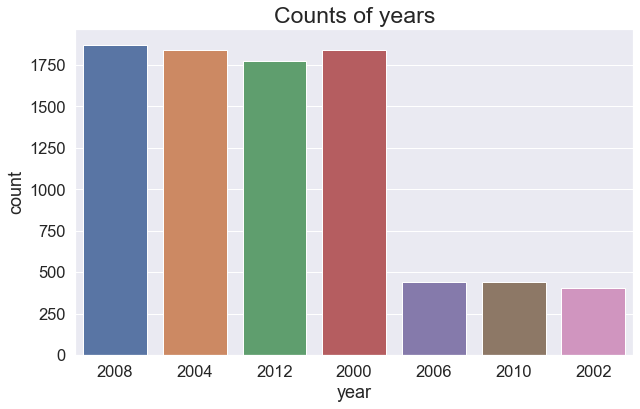

In [26]:
sns.countplot(x='year', data=olympic)
plt.title('Counts of years', fontsize=23)

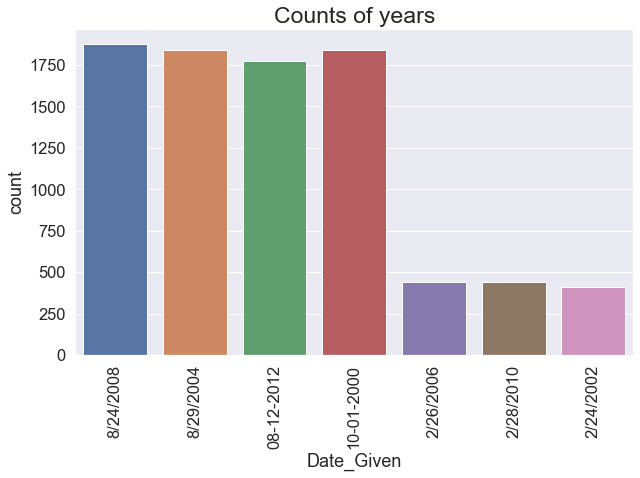

In [27]:
sns.countplot(x='Date_Given', data=olympic)
plt.xticks(rotation=90)
plt.title('Counts of years', fontsize=23)
plt.show()

## Bivariate Analysis
Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent. These variables are usually denoted by X and Y. So, here we analyse the changes occured between the two variables and to what extent.

In [28]:
olympic.sort_values(by=['gold_medal'], inplace=True)
gold1 = olympic.tail(10)

-  **Analying who had the mximum gold medal**

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Samppa Lajunen'),
  Text(1, 0, 'Marit Bjørgen'),
  Text(2, 0, 'Allison Schmitt'),
  Text(3, 0, 'Ian Thorpe'),
  Text(4, 0, 'Wang Meng'),
  Text(5, 0, 'Missy Franklin'),
  Text(6, 0, 'Ole Einar Bjørndalen'),
  Text(7, 0, 'Michael Phelps')])

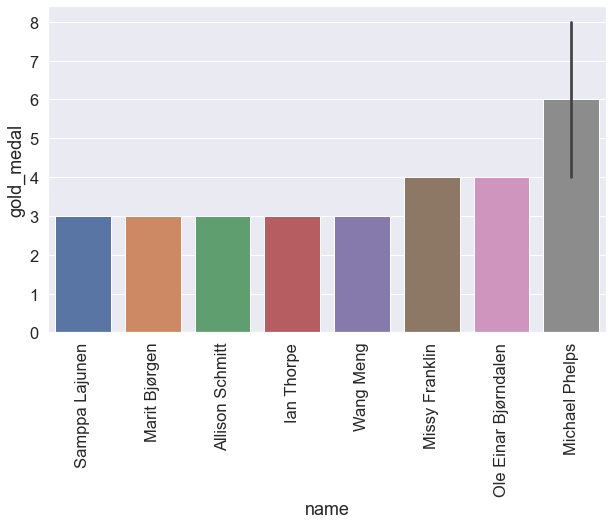

In [29]:
olympic.sort_values(by=['gold_medal'], inplace=True)
gold1 = olympic.tail(10)
sns.barplot(x='name', y='gold_medal', data=gold1)
plt.xticks(rotation=90)

-  **Analying who had the mximum silver medal**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Claudia Künzel-Nystad'),
  Text(1, 0, 'Dara Torres'),
  Text(2, 0, 'Alicia Coutts'),
  Text(3, 0, 'Martina Glagow-Beck'),
  Text(4, 0, 'Johnny Spillane'),
  Text(5, 0, 'László Cseh Jr.'),
  Text(6, 0, 'Nastia Liukin'),
  Text(7, 0, 'Shawn Johnson'),
  Text(8, 0, "Susie O'Neill"),
  Text(9, 0, 'Kirsty Coventry')])

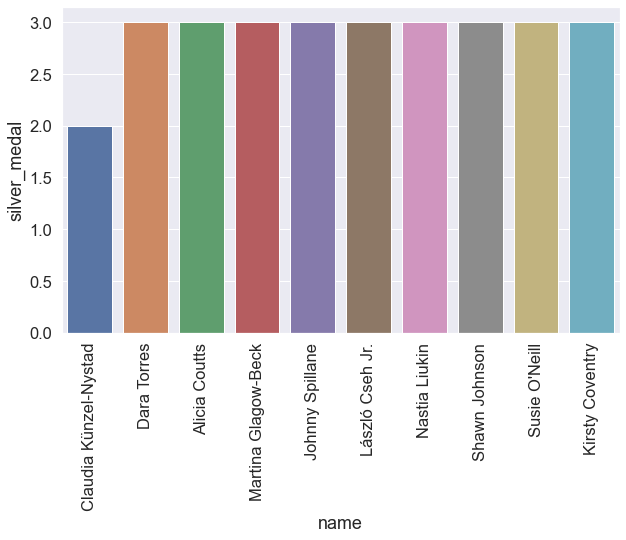

In [30]:
olympic.sort_values(by=['silver_medal'], inplace=True)
silver1 = olympic.tail(10)
sns.barplot(x='name', y='silver_medal', data=silver1)
plt.xticks(rotation=90)

-  **Analying who had the mximum brone medal**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Olga Zabelinskaya'),
  Text(1, 0, 'Anna Kozlova'),
  Text(2, 0, 'Elisabeth Görgl'),
  Text(3, 0, 'Pang Jiaying'),
  Text(4, 0, 'Stefano Carozzo'),
  Text(5, 0, 'Dara Torres'),
  Text(6, 0, 'Aleksey Nemov'),
  Text(7, 0, 'Natalie Coughlin'),
  Text(8, 0, 'Felix Gottwald'),
  Text(9, 0, 'Antje Buschschulte')])

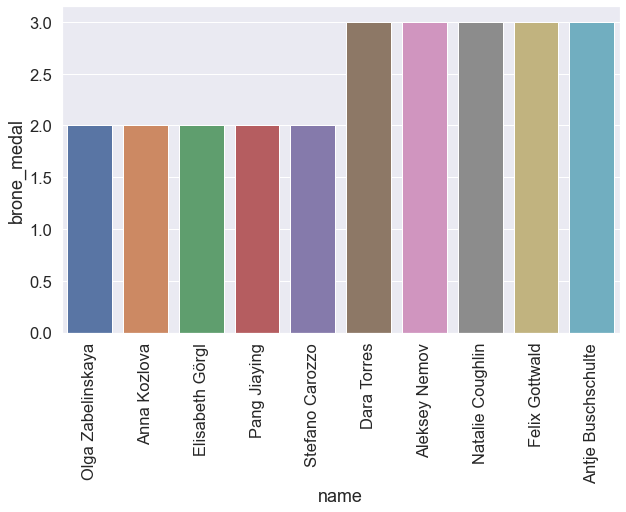

In [31]:
olympic.sort_values(by=['brone_medal'], inplace=True)
brone1 = olympic.tail(10)
sns.barplot(x='name', y='brone_medal', data=brone1)
plt.xticks(rotation=90)

-  **Analying who had the mximum Total medals**

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Nastia Liukin'),
  Text(1, 0, 'Ryan Lochte'),
  Text(2, 0, 'Ian Thorpe'),
  Text(3, 0, 'Cindy Klassen'),
  Text(4, 0, 'Alicia Coutts'),
  Text(5, 0, 'Michael Phelps'),
  Text(6, 0, 'Aleksey Nemov'),
  Text(7, 0, 'Natalie Coughlin')])

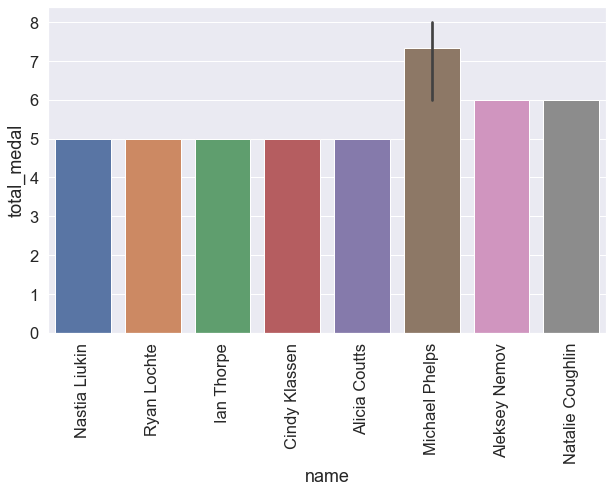

In [32]:
olympic.sort_values(by=['total_medal'], inplace=True)
total1 = olympic.tail(10)
sns.barplot(x='name', y='total_medal', data=total1)
plt.xticks(rotation=90)
# total1

## Corelation of the features with eachother.

- **What is correlation analysis?**

     Correlation analysis in research is a statistical method used to measure the strength of the linear relationship between two variables and compute their association. Simply put - correlation analysis calculates the level of change in one variable due to the change in the other.

<AxesSubplot:>

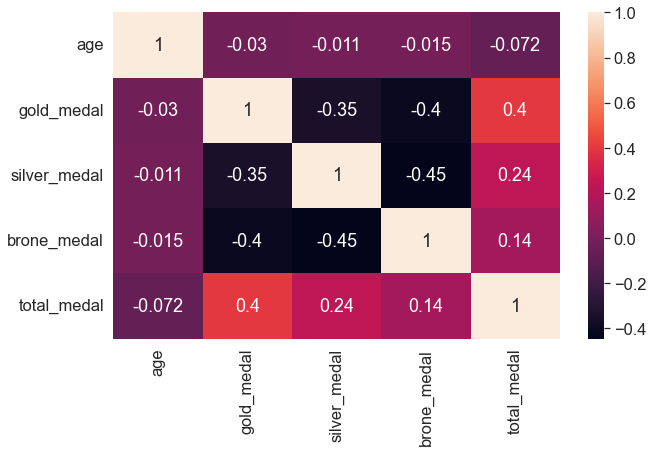

In [33]:
sns.heatmap(olympic.corr(), annot=True)

## Analysing all the Features wirth each other

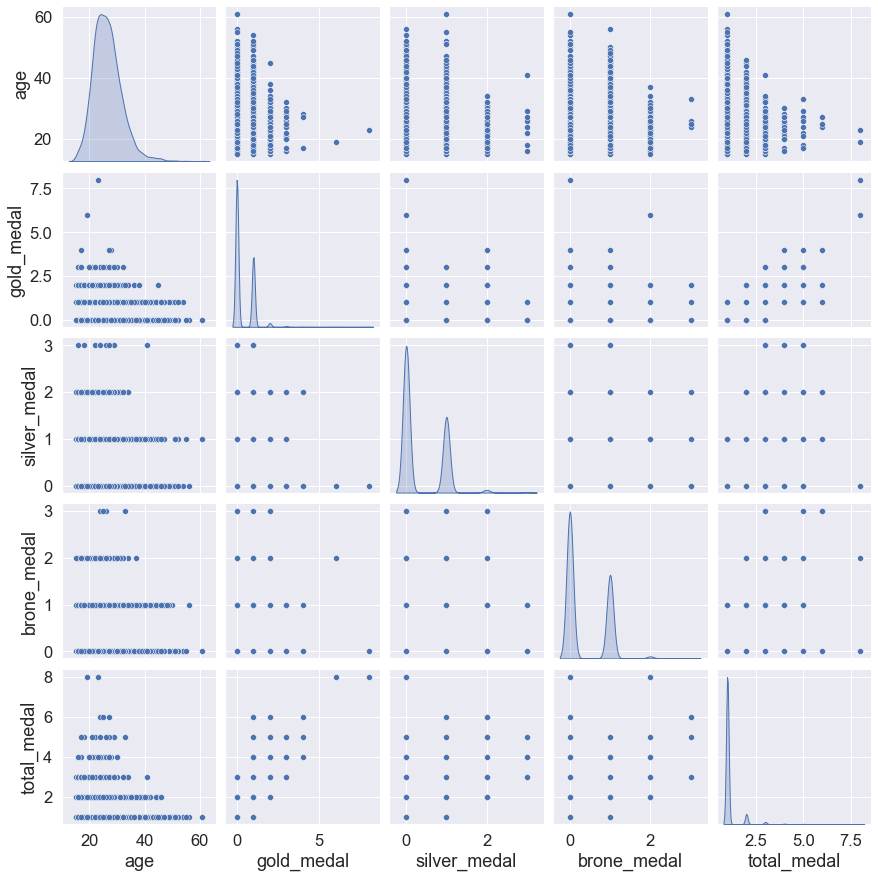

In [34]:
sns.pairplot(olympic,diag_kind='kde')

##  Checking if the age dataset is skewed or symmetric

In [35]:
# Checking the skewness 
olympic.age.skew()

0.8591601167892495

<AxesSubplot:xlabel='age', ylabel='Count'>

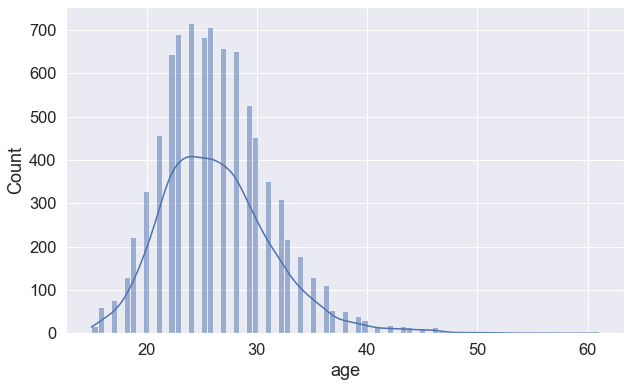

In [36]:
# Anyalysing the skewness with the help of histogram 
sns.histplot(x='age', data=olympic, kde=True)

Here the age data is **Moderately skewed** towards the left side.

The skewness value for the **'age'** is **0.8591601167892493**

We are having highly skewed data. If there are too much skewness in the data, then many statistical model don't work properly. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model's performance.

So, for reducing the skewness **Transformation** is used. Transformation can be done by **Square root(sqrt)** transformation, **Cube root(cbrt)** transformation, **Log** transformation, **Boxcox** transormation and many others.

We are applying **Transformation** here.

## Applying Log Transformation. 

In [37]:
olympic_log = olympic.copy(deep=True)
olympic_log['age'] = np.log(olympic_log['age'])
olympic_log['age'].skew()

0.1548511446365634

<AxesSubplot:xlabel='age', ylabel='Count'>

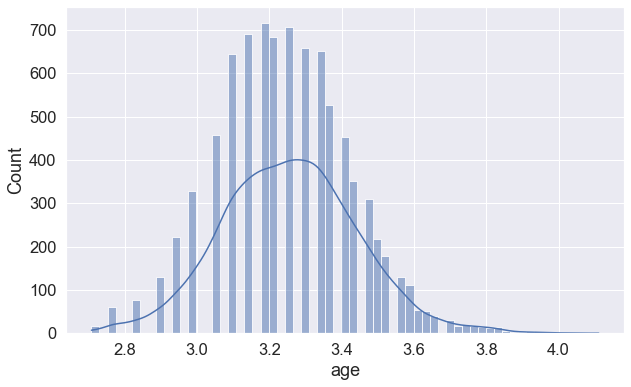

In [38]:
sns.histplot(x='age', data=olympic_log, kde=True)

After applying the Log Transformation we can see that the skewness of the dataset is no more and the data is normally distributed now.

## Performing appropriate numerical measures on each column

A variety of numerical measures are **used to summarize data**. The proportion, or percentage, of data values in each category is the primary numerical measure for qualitative data.

In [39]:
# Numeric measures for the numerical columns.
olympic.describe()

,age,gold_medal,silver_medal,brone_medal,total_medal
count,8615.00000,8615.000000,8615.000000,8615.000000,8615.000000
mean,26.40534,0.364829,0.363088,0.377829,1.105746
std,5.10153,0.545401,0.511564,0.505044,0.408958
min,15.00000,0.000000,0.000000,0.000000,1.000000
25%,23.00000,0.000000,0.000000,0.000000,1.000000
50%,26.00000,0.000000,0.000000,0.000000,1.000000
75%,29.00000,1.000000,1.000000,1.000000,1.000000
max,61.00000,8.000000,3.000000,3.000000,8.000000


In this we can see the total counts, average value, standard daviation, minimum value, IQ1, IQ2, IQ3 and the maximum values of each and every column.

In [40]:
# Numeric measures for the categorical columns.
olympic.describe(include=object)

,name,country,year,Date_Given,sports
count,8615,8615,8615,8615,8615
unique,6956,110,7,7,49
top,Jason Lezak,United States,2008,8/24/2008,Athletics
freq,4,1109,1872,1872,687


In this we can analyse the total counts, number of unique values, top values and the frequency of the value for each and every columns.

## Top 10 countries with the gold medal

In [41]:
medal = olympic.groupby('country').sum()
medal.sort_values(by=['gold_medal'], inplace=True)
gold = medal.tail(10)
gold

,age,gold_medal,silver_medal,brone_medal,total_medal
country,,,,,
Netherlands,7723.0,101,135,82,318
France,7758.0,108,107,103,318
South Korea,6796.0,110,93,105,308
Great Britain,8300.0,124,101,97,322
Australia,13742.0,163,226,220,609
Canada,9800.0,168,98,104,370
Germany,15119.0,223,183,223,629
China,10675.0,234,156,140,530
Russia,18177.0,234,221,313,768


The above given countries are the Top 10 countries with the **Gold Medals**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Netherlands'),
  Text(1, 0, 'France'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Great Britain'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'China'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'United States')])

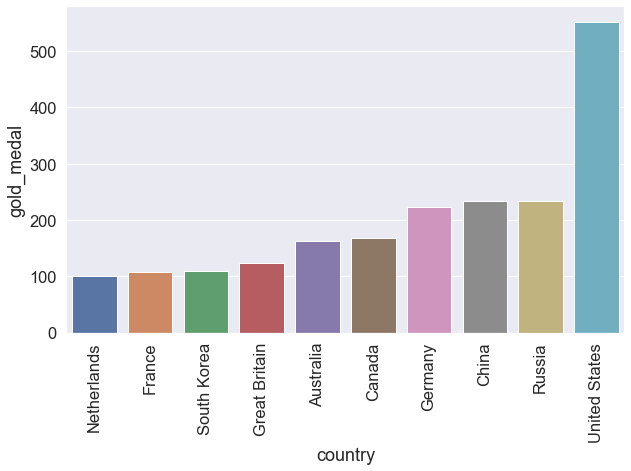

In [42]:
sns.barplot(x = gold.index, y = gold.gold_medal)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='gold_medal'>

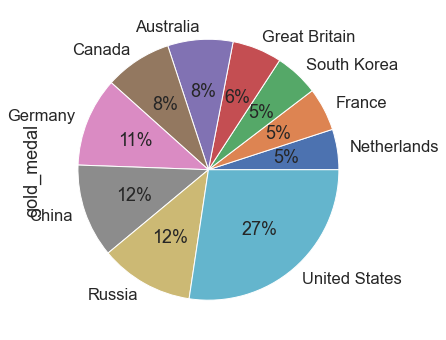

In [43]:
gold.gold_medal.plot(kind='pie', autopct='%.0f%%')

We can easily Visualize the top 10 countries with the **Gold Medal** easily by the above given graph.

## Top 10 countries with the silver medal

In [44]:
medal.sort_values(by=['silver_medal'], inplace=True)
silver = medal.tail(10)
silver

,age,gold_medal,silver_medal,brone_medal,total_medal
country,,,,,
Italy,8644.0,86,103,142,331
France,7758.0,108,107,103,318
Japan,6614.0,57,112,113,282
Spain,5286.0,19,116,70,205
Netherlands,7723.0,101,135,82,318
China,10675.0,234,156,140,530
Germany,15119.0,223,183,223,629
Russia,18177.0,234,221,313,768
Australia,13742.0,163,226,220,609


The above given countries are the Top 10 countries with the **Silver Medals**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Italy'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Spain'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'China'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Russia'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'United States')])

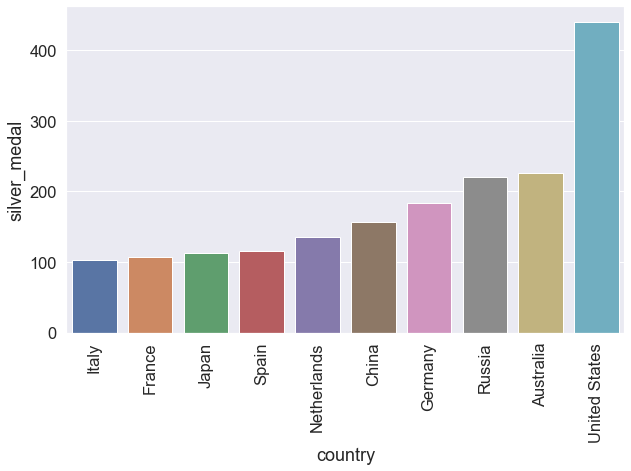

In [45]:
sns.barplot(x = silver.index, y = silver.silver_medal)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='silver_medal'>

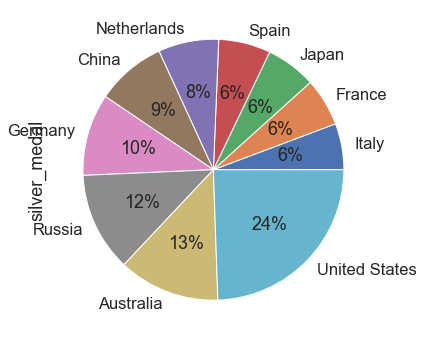

In [46]:
silver.silver_medal.plot(kind='pie', autopct='%.0f%%')

We can easily Visualize the top 10 countries with the **Silver Medal** easily by the above given graph.

## Top 10 countries with the brone medal

In [47]:
medal.sort_values(by=['brone_medal'], inplace=True)
brone = medal.tail(10)
brone

,age,gold_medal,silver_medal,brone_medal,total_medal
country,,,,,
France,7758.0,108,107,103,318
Canada,9800.0,168,98,104,370
South Korea,6796.0,110,93,105,308
Japan,6614.0,57,112,113,282
China,10675.0,234,156,140,530
Italy,8644.0,86,103,142,331
Australia,13742.0,163,226,220,609
Germany,15119.0,223,183,223,629
Russia,18177.0,234,221,313,768


The above given countries are the Top 10 countries with the **brone Medals**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'France'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'China'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'United States')])

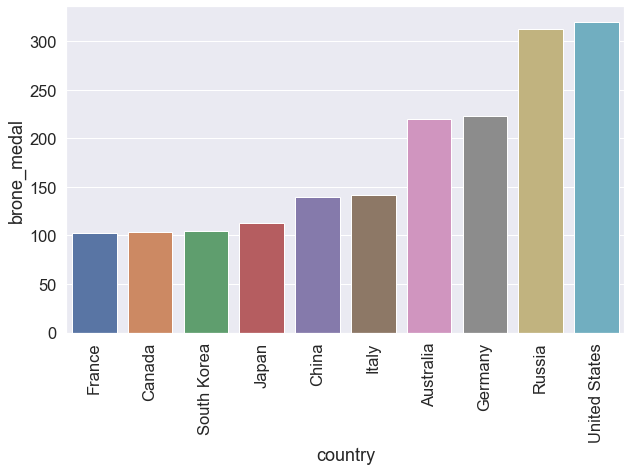

In [48]:
sns.barplot(x = brone.index, y = brone.brone_medal)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='brone_medal'>

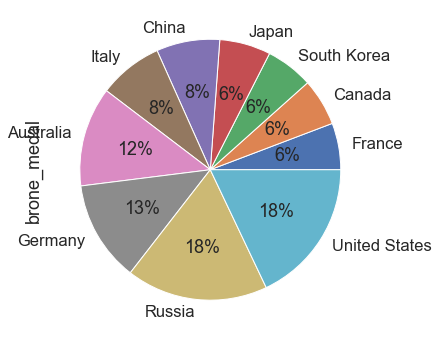

In [49]:
brone.brone_medal.plot(kind='pie', autopct='%.0f%%')

We can easily Visualize the top 10 countries with the **Brone Medal** easily by the above given graph.

## Top 10 countries with the total medals.

In [50]:
medal.sort_values(by=['total_medal'], inplace=True)
total = medal.tail(10)
total

,age,gold_medal,silver_medal,brone_medal,total_medal
country,,,,,
Netherlands,7723.0,101,135,82,318
France,7758.0,108,107,103,318
Great Britain,8300.0,124,101,97,322
Italy,8644.0,86,103,142,331
Canada,9800.0,168,98,104,370
China,10675.0,234,156,140,530
Australia,13742.0,163,226,220,609
Germany,15119.0,223,183,223,629
Russia,18177.0,234,221,313,768


The above given countries are the Top 10 countries with the **Total Medals**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Netherlands'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Great Britain'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'China'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'United States')])

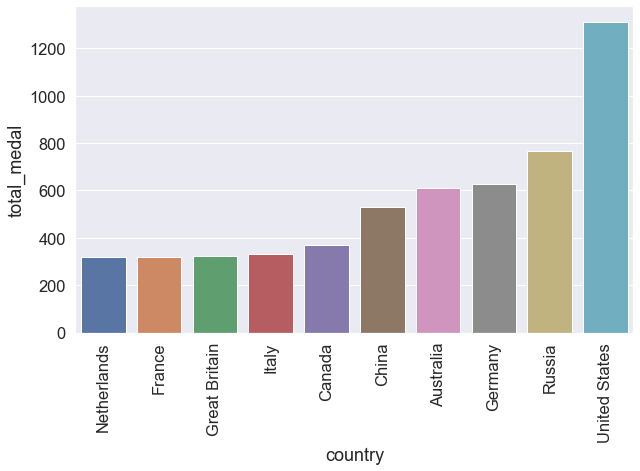

In [51]:
sns.barplot(x = total.index, y = total.total_medal)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='total_medal'>

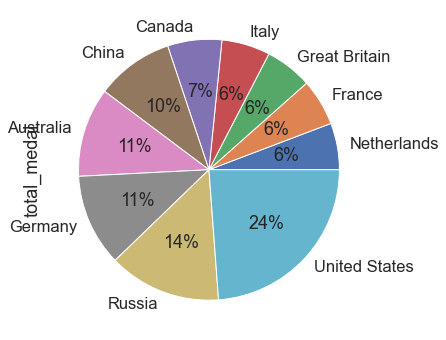

In [52]:
total.total_medal.plot(kind='pie', autopct='%.0f%%')

We can easily Visualize the top 10 countries with the **Total Medal** easily by the above given graph.

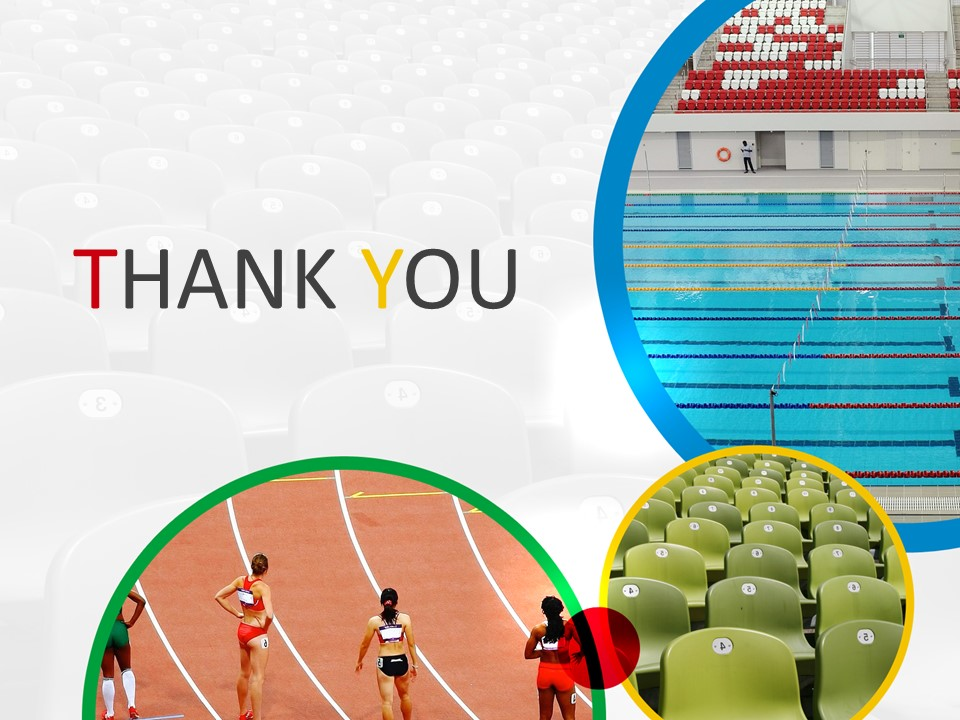
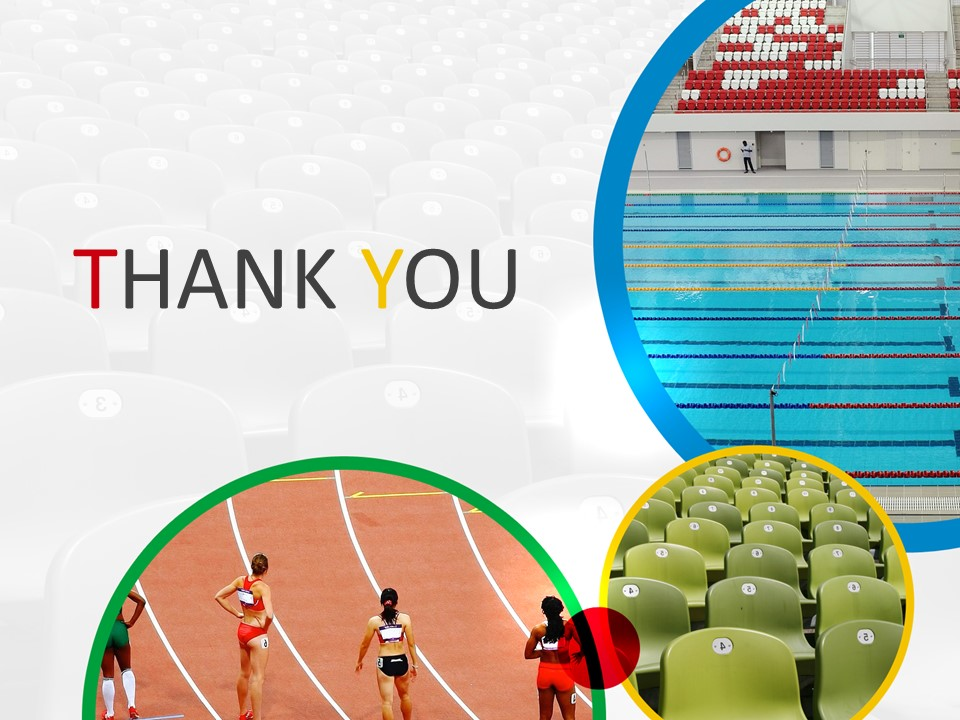